## Example 3: Hessian and Normal Modes
The luminous efficiency is defined by the following integral:
\begin{equation}
\eta_{lum} = \frac{\int_0^{\infty} BB(\lambda, T) \epsilon(\lambda) v(\lambda) d\lambda}{\int_0^{\infty} BB(\lambda, T) \epsilon(\lambda)d\lambda},
\end{equation}
where $BB(\lambda, T)$ is Planck's blackbody law, $\epsilon(\lambda)$ is the emissivity function 
of the structure, and $v(\lambda)$ is the photopic luminosity function that characterizes the color sensisitivity of the human eye.  Only the $\epsilon(\lambda)$ function depends on the structure itself.

One model structure we have examined for related selective emitter applications (i.e. solar thermophotovoltaics) is the "critically-coupled" selective emitter.  Such an emitter may include both a Bragg reflector component (alternating transparent materials like glass and titania) and a weak-absorber (which may be an alloy of a metal and a transparent material, or may take on some other form).  The point of the former component is to strongly reflect light across a range of wavelengths, and the point of the latter is to absorb light across a range of wavelengths.  When the absorption and reflection ranges are well-mateched, critically coupling can be achieved whereby the absorbing layer ultimately absorbs almost all incident light in a limited wavelength range.  This property also gives the structure the ability to thermally emit light in that same wavelength range.  This model is promising because the reflection wavelength range can be tuned fairly easily in Bragg reflectors by choice of layer thickness and choice
of contrast between the low- and high-RI layers.  

In particular, the center wavelength of the Bragg Reflectors strong reflection is approximately
\begin{equation}
\lambda_c = 4 \cdot n \cdot d,
\end{equation}
where $n$ is the refractive index of the layer and $d$ is the thickness of the layer.  Sometimes, people report central frequency rather than central wavelength for a Bragg Reflector, and the central frequency is related by 
\begin{equation}
f_c = \frac{c}{\lambda_c}.
\end{equation}
The frequency range around the central frequency is related to the difference between the high ($n_2$) and low ($n_1)$ refractive index layers as
\begin{equation}
\Delta f = \frac{4}{\pi} {\rm arcsin}\left( \frac{n_2 - n_1}{n_2 + n_1}\right) \cdot f_c.
\end{equation}

In other words, the features of the reflectance spectrum of the Bragg Reflector can be tuned through choice of materials and thicknesses of the Bragg Reflector layers.  A simple hypothesis would be that an ideal Bragg Reflector component for the Incandescent bulb structure would be one whose central frequency and frequency width align perfectly with the photopic luminosity function.  

### Question 1: What should $f_c$ be for a Bragg Reflector which is perfectly matched for the photopic luminosity function

### Question 2: Assuming $n_2 = 2.4$ (similar to TiO$_2$), what should $n_1$ so that the bandwidth of this Bragg reflector matches the bandwidth of the photopic luminosity function?

### Question 3: What is an actual material with a refractive index close to the $n_1$ you found above?

### Question 4: What should $d_1$ and $d_2$ be such that the Bragg reflector has the desired center wavelength to match the photopic luminosity function?  ($d_1$ is the thickness of the layer that has refractive index $n_1$, etc).

The second component is the weak absorber component.  Perhaps the simplest model for a tunable weak absorber is a material whose refractive index is approximated by the so-called Lorentz Oscillator model:
\begin{equation}
n_L(\omega) = \sqrt{1 + \frac{\omega_P^2}{\omega_0^2 - \omega^2 - i \gamma \omega} },
\end{equation}
where $\omega = 2\pi \cdot f$ is the angular frequency, $\omega_P$ is called the bulk Plasmon frequency of the material, $\omega_0$ is the central angular frequency of absorption, $\gamma$ is related to the bandwidth around the central frequency (larger $\gamma$ means a broader absorption peak, smaller $\gamma$ means a narrower absorption peak).

WPTherml has a built-in function called *layer_lorentz(layer, omega_p, omega_0, gamma)* that defines 
the *layer*-th layer in a multi-layer structure to have a refractive index specified by the Lorentz oscillator function defined with parameters $\omega_P$ = *omega_p*, $\omega_0$ = *omega_0*, and $\gamma$ = *gamma*.  The following code plots the visible and near IR absorptivity/emissivity of a 10 nm slab 
with refractive index given by the Lorentz oscillator with 
$\omega_0 = \frac{2 \pi c}{530 \cdot 10^{-9} m}, \gamma = \frac{2 \pi c}{7000 \cdot 10^{-9} m},$
and $\omega_P = \frac{2 \pi c}{1000 \cdot 10^{-9} m}$ where $c = 299792458 m/s$ (the speed of light).


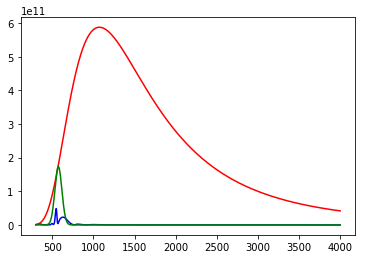

Luminous Efficiency Value is  43.55516107325148


In [2]:
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline


### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
d1 = 550e-9/(4*1.4442)
d2 = 550e-9/(4*2.0294)
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2', 'Al2O3', 'TiO2','Al2O3', 'TiO2', 'Al2O3', 'TiO2','Air'], 
        'Thickness_List': [0, 10e-9, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2, d1, d2,  0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }


### create instance of multilayer
lorentz_slab = multilayer(structure)
BB = datalib.BB(lorentz_slab.lambda_array, lorentz_slab.T_ml)
Ph = datalib.PhLum(lorentz_slab.lambda_array)
### define Lorentz parameters
c = 299792458
layer = 1
omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9

### create a layer in the multilayer structure defined
### by those Lorentz parameters
lorentz_slab.layer_lorentz(layer, omega_p, omega_0, gamma)
### Update optical properties with new material
lorentz_slab.fresnel()
### Update thermal emission properties with new material
lorentz_slab.thermal_emission()
### Update luminous efficiency with new material
lorentz_slab.luminous_efficiency()
### Plot emissivity and print efficiency!
plt.plot(lorentz_slab.lambda_array*1e9, lorentz_slab.thermal_emission_array, 'blue')
plt.plot(lorentz_slab.lambda_array*1e9, BB, 'red')
plt.plot(lorentz_slab.lambda_array*1e9, BB*Ph, 'green')


plt.show()
print("Luminous Efficiency Value is ",100*lorentz_slab.luminous_efficiency_val)


### Question 5:  How should you choose $\omega_0$ and $\gamma$ to match the photopic luminosity function?  Plot the emissivity of a Lorentz oscillator slab that you believe is ideally suited for the photopic luminosity function.

### Question 6: What is the luminous efficiency of this Lorentz slab?

### Question 7: What happens when you combine the Lorentz oscillator slab with your previously-chosen Bragg reflector?  In particular, how does the emissivity profile change and how does the luminous efficiency change?  

To answer, create a new instance of the multi-layer class that has the Lorentz slab as its top-most layer and then has a Bragg reflector using materials chosen from Question 3, plot its emissivity spectrum and compute its Luminous efficiency.  Experiment a bit with the number of Bragg reflector layers; for example, try two repeats of alternating $n_1$ and $n_2$, three repeats, four repeats.  Note how the number of repeats changes the luminous efficiency and the spectra.

One fundamental question is how best to change the various parameters of such a "critically-coupled" structure to improve its performance.  Analysis that might give insight takes inspiration from chemistry, where "normal modes" of a molecule are identified as the unique modes of motion, some of which are responsible for changing a molecule from one structure to another.  The normal modes for a molecule are obtained by first constructing the so-called Hessian matrix of the molecule (the second derivative of energy with respect to all possible changes in the atom positions), then identifying the eigenvalues and eigenvectors.  The eigenvectors represent the normal modes of motion and the eigenvalues represent their frequency (related to their energy).  Incidentally, IR spectroscopy probes the frequency/energy of such normal modes.

In our system, we can define the elements of the Hessian matrix as follows:
\begin{equation}
H_{ij} = \frac{\partial^2 \eta_{lum}}{\partial x_i \partial x_j},
\end{equation}
here $\eta_{lum}$ represents the luminous efficiency and $x_i$ and $x_j$ are 
different structural parameters that can be used to change the emissivity and the luminous efficiency 
of the structure.  For the critcally-coupled structures, these parameters include $\omega_P$, $\omega_0$, $\gamma$, $n_1$, $n_2$, $d_L$, $d_1$, and $d_2$; hence the Hessian is a 8x8 matrix!  In the following,
let's denote $x_1 = \omega_P, x_2 = \omega_0, x_3 = \gamma, x_4 = d_L, x_5 = n_1, x_6 = n_2, x_7 = d_1, x_8 = d_2$. 

The method of finite-differences can be used to compute the elements of the Hessian matrix.  For concreteness,
consider the element $H_{12}$:
\begin{equation}
\frac{\partial^2 \eta_{lum}(x_1, x_2, ..., x_8)}{\partial x_1 \partial x_2} = 
\frac{ \frac{\partial \eta_{lum}(x_1+h_1, x_2, ..., x_8) }{\partial x_2} - \frac{\partial \eta_{lum}(x_1 - h_1, x_2, ...,x_8)}{\partial x_2} }{2h_1},
\end{equation}
where
\begin{equation}
\frac{\partial \eta_{lum}(x_1+h_1, x_2, ..., x_8) }{\partial x_2} = 
\frac{\eta_{lum}(x_1, x_2+h_2, ..., x_8) - \eta_{lum}(x_1, x_2-h_2, ..., x_8) }{2h_2},
\end{equation}
and $h_1$ and $h_2$ are suitably small changes that can be made to the parameters $x_1$ and $x_2$, respectively.
The (somewhat cumbersome) function below computes the elements of the Hessian matrix for a system that includes
a Lorentz layer with thickness $d_L$ as the top-most layer, 2 periods of a Bragg-reflector with $n_1$, $d_1$ for the low-index layer and $n_2$, $d_2$ for the high-index layer:


In [49]:
### Re-define structure:
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'AlN', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, d1, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9
### define instance called 'cc'
cc = multilayer(structure)

### a function to take an array of values x_1, ..., x_8 as defined above,
### re-define the multi-layer structure according to its values, and
### then update the luminous efficiency accordingly:
def update_multilayer(x):
    ### recall x_1 is omega_p, x_2 is omega_0, x_3 is gamma
    #cc.layer_lorentz(1, omega_p, omega_0, gamma)
    cc.d[1] = x[0]*1e-9
    print(cc.d[1])
    ### now we have the new structure, update fresnel quantities
    cc.fresnel()
    ### now we have new emissivity, update thermal emission
    cc.thermal_emission()
    
    ### now we have new thermal emission, update luminous efficiency
    cc.luminous_efficiency()

    ### return luminous efficiency
    return -cc.luminous_efficiency_val*100

def analytic_grad(x0):
    dim = len(x0)
    g = np.zeros(dim)
    cur = update_multilayer(x0)
    for i in range(1,dim+1):
        cc.fresnel_prime(i)
        cc.luminous_efficiency_prime()
        g[i-1] = cc.luminous_efficiency_prime_val
    return -g*60*1e-7
        
### array of parameters
x = np.zeros(1)
### define lorentz parameters
c = 299792458
layer = 1
omega_0 = 2*np.pi*c/550e-9
gamma = 2*np.pi*c/7500e-9
omega_p = 2*np.pi*c/1000e-9




### create array of h values... 0.01*x should do it!
hi = 0.01*x
hj = 0.005*x
test = update_multilayer(x)
print(test)

def BuildGradient(x0):
    #h0 = 0.0001*x0
    dim = len(x0)
    #h0 = 0.1e-9*np.ones(dim)
    
    h0 = np.zeros(dim)
    
    for j in range(0,dim):
        h0[j] = x0[j]*.01
        
    g = np.zeros(dim)
    for i in range(0,dim):
        xpass = np.copy(x0)
        fx = x0[i] + h0[i]
        bx = x0[i] - h0[i]
        xpass[i] = fx
        efx = update_multilayer(xpass)
        xpass[i] = bx
        ebx = update_multilayer(xpass)
        
        run = 2*h0[i]
        g[i] = (efx-ebx)/(run*1e-9)
    return g


def BuildHessian(x0, hi0, hj0):
    ### loop through elements i and j
    dim = len(x0)
    H = np.zeros((dim,dim))
    
    for i in range(0,dim):
        fxi = x0[i] + hi0[i]
        bxi = x0[i] - hi0[i]
        runi = 2*hi0[i]
        
        for j in range(0, dim):
            fxj = x0[j] + hj0[j]
            bxj = x0[j] - hj0[j]
            runj = 2*hj0[j]
            
            ### forward i forward j
            xpass = np.copy(x0)
            xpass[i] = fxi
            xpass[j] = fxj
            nff = update_multilayer(xpass)
            
            ### forward i backward j
            xpass[j] = bxj
            nfb = update_multilayer(xpass)
            
            ### backward i backward j
            xpass[i] = bxi
            nbb = update_multilayer(xpass)
            
            ### backward i forward j
            xpass[j] = fxj
            nbf = update_multilayer(xpass)
            
            gf = (nff - nfb)/runj
            gb = (nbf - nbb)/runj
            
            H[i][j] = (gf - gb)/runi
            
    return H

def SuperFunc(x):
    en = update_multilayer(x)
    gr = analytic_grad(x)
    return en, gr

x[0] = 0.01
en = update_multilayer(x)
g = BuildGradient(x)
ga = analytic_grad(x)
#SH = BuildHessian(x, hi, hj)

print(en)
print("N",g)
print("an",ga)
#print(SH)
    

0.0
-3.844579692151393
1.0000000000000001e-11
1.0100000000000001e-11
9.900000000000001e-12
1.0000000000000001e-11
-3.8449823789491204
N [-40285301.08168837]
an [-2.41711766]


In [41]:
def print_fun(x, f, accepted):
    print("at minimum %.4f  %.4f accepted %d" % (x, f, int(accepted)))
    
class MyBounds(object):
    def __init__(self, xmax=[1000], xmin=[1] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

from scipy.optimize import minimize
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "BFGS", "jac": True}
mybounds = MyBounds()
xs = np.array([150])
print(SuperFunc(xs))

trial = np.linspace(1.,100.,50)
print(trial)
n_vs_d = np.zeros(len(trial))
g_vs_d = np.zeros(len(trial))
idx = 0
for t in trial:
    xs[0] = t
    n_vs_d[idx] = update_multilayer(xs)
    g = analytic_grad(xs)
    g_vs_d[idx] = g[0]
    idx = idx + 1



#res = minimize(update_multilayer, xs, method='nelder-mead', options={'xtol':1e-10, 'disp': True})
#res1 = minimize(update_multilayer, xs, method='BFGS', jac=BuildGradient, options={'disp': True})
#res2 = basinhopping(SuperFunc, xs, minimizer_kwargs=minimizer_kwargs, niter=10, callback=print_fun, accept_test=mybounds)

#print("BFGS solution",res1.x)
#print("BFGS efficiency",update_multilayer(res1.x))
#print("BFGS gradient",BuildGradient(res1.x))

#print("BH solution",res2.x)
#print("BH efficiency",update_multilayer(res2.x))
#print("BH an gradient",analytic_grad(res2.x))
#print("BH num gradient",BuildGradient(res2.x))


1.5000000000000002e-07
1.5000000000000002e-07
(-3.360106920783305, array([0.02249338]))
[  1.           3.02040816   5.04081633   7.06122449   9.08163265
  11.10204082  13.12244898  15.14285714  17.16326531  19.18367347
  21.20408163  23.2244898   25.24489796  27.26530612  29.28571429
  31.30612245  33.32653061  35.34693878  37.36734694  39.3877551
  41.40816327  43.42857143  45.44897959  47.46938776  49.48979592
  51.51020408  53.53061224  55.55102041  57.57142857  59.59183673
  61.6122449   63.63265306  65.65306122  67.67346939  69.69387755
  71.71428571  73.73469388  75.75510204  77.7755102   79.79591837
  81.81632653  83.83673469  85.85714286  87.87755102  89.89795918
  91.91836735  93.93877551  95.95918367  97.97959184 100.        ]
1e-09
1e-09
3.0000000000000004e-09
3.0000000000000004e-09
5e-09
5e-09
7.000000000000001e-09
7.000000000000001e-09
9.000000000000001e-09
9.000000000000001e-09
1.1000000000000001e-08
1.1000000000000001e-08
1.3e-08
1.3e-08
1.5000000000000002e-08
1.5000000

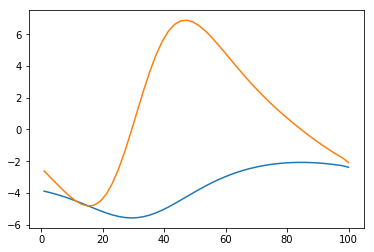

In [48]:
plt.plot(trial, n_vs_d)
plt.plot(trial, 60*g_vs_d)

In [50]:
xs[0] = 100
res2 = basinhopping(SuperFunc, xs, minimizer_kwargs=minimizer_kwargs, niter=20, callback=print_fun, accept_test=mybounds)

1.0000000000000001e-07
1.0000000000000001e-07
1.0000000000000001e-07
1.0000000000000001e-07
1.0101000000000002e-07
1.0101000000000002e-07
1.0505e-07
1.0505e-07
1.2121e-07
1.2121e-07
1.8584999999999999e-07
1.8584999999999999e-07
1.8774310692698857e-07
1.8774310692698857e-07
1.9531553463494294e-07
1.9531553463494294e-07
2.256052454667605e-07
2.256052454667605e-07
3.467640887940307e-07
3.467640887940307e-07
3.3435113547932924e-07
3.3435113547932924e-07
3.399477503985248e-07
3.399477503985248e-07
3.432367916426071e-07
3.432367916426071e-07
3.434545697455887e-07
3.434545697455887e-07
3.434638944480727e-07
3.434638944480727e-07
3.4350119325800884e-07
3.4350119325800884e-07
3.435028662745858e-07
3.435028662745858e-07
3.4350955834089367e-07
3.4350955834089367e-07
3.4353632660612516e-07
3.4353632660612516e-07
3.436433996670511e-07
3.436433996670511e-07
3.436497912927751e-07
3.436497912927751e-07
3.4367535779567116e-07
3.4367535779567116e-07
3.4367652912103616e-07
3.4367652912103616e-07
3.436812

KeyboardInterrupt: 

In [ ]:
# trial_1 = [26.09247734, 88.37386074, 123.17937165, 150.32905986, 144.63047232]
# trial_2 = [26.09247734, 88.3738607, 123.17937262, 150.32906231, 144.63047188]

# print('Trial_1', BuildGradient(trial_1))
# print('Trial_2', BuildGradient(trial_2))
structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'SiO2', 'AlN', 'SiO2', 'AlN', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10e-9, d1 , d2, d1, d2, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

cc = multilayer(structure)

structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'SiO2', 'AlN', 'SiO2', 'AlN', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10e-9 +.1e-9, d1 , d2, d1, d2, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

ccf = multilayer(structure)

structure = {
        ### No material actually called "Lorentz", so just use SiO2 as a placeholder
        ### that we can change later
        'Material_List' : ['Air', 'SiO2', 'SiO2', 'AlN', 'SiO2', 'AlN', 'W', 'Air'], 
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0, 10e-9 - .1e-9, d1, d2, d1, d2, 900e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000],
        'Temperature': 2700,
        'LIGHTBULB': 1
     
        }

ccb = multilayer(structure)

cc.layer_lorentz(1, omega_p, omega_0, gamma)
ccf.layer_lorentz(1, omega_p, omega_0, gamma)
ccb.layer_lorentz(1, omega_p, omega_0, gamma)
cc.fresnel()
ccf.fresnel()
ccb.fresnel()
cc.fresnel_prime(1)
cc.luminous_efficiency_prime()
ccf.luminous_efficiency()
ccb.luminous_efficiency()
num_grad = (ccf.luminous_efficiency_val - ccb.luminous_efficiency_val)/(2*cc.d[1]/100)

print('num grad =', num_grad)
print('grad =', cc.luminous_efficiency_prime_val)



# def num_reflectivity_prime(f, b,d1):
#     rp = (f-b)/2*(d1/100)
#     return rp

# def num_emisivity_prime(f, b,d1):
#     rp = (f-b)/2*(d1/100)
#     return ep
num_reflectivity_prime = (ccf.reflectivity_array-ccb.reflectivity_array)/(2*cc.d[1]/100)
num_emissivity_prime = (ccf.emissivity_array-ccb.emissivity_array)/(2*cc.d[1]/100)

plt.plot(cc.lambda_array*1e9, cc.emissivity_prime_array, 'blue')
plt.plot(cc.lambda_array*1e9, num_emissivity_prime, 'red' )
plt.xlim(0, 1000)
plt.show




In [ ]:
print("global minimum: x = [%.4f, %.4f], f(x0) = %.4f" % (res2.x[0], res2.x[1], res2.fun))
#print(res.x)
#print(update_multilayer(res.x))
#print(BuildGradient(res.x))
#g = BuildGradient(res.x)
#print(np.sqrt(g[0]**2 + g[1]**2))